In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Problem 1

In [85]:
df = pd.read_csv("cell-count.csv")
df.head()

project subject condition  age sex treatment response sample sample_type  \
0    prj1    sbj1  melanoma   70   F       tr1        y     s1        PBMC   
1    prj1    sbj1  melanoma   70   F       tr1        y     s2        PBMC   
2    prj1    sbj1  melanoma   70   F       tr1        y     s3        PBMC   
3    prj1    sbj2   healthy   65   F      none      NaN     s4        PBMC   
4    prj1    sbj3  melanoma   75   M       tr1        n     s5        PBMC   

   time_from_treatment_start  b_cell  cd8_t_cell  cd4_t_cell  nk_cell  \
0                        0.0   36000       24000       42000     6000   
1                        7.0   30000       22000       40000     2000   
2                       14.0   35000       26250       37500    10000   
3                        NaN   27900       17100       18000     4500   
4                        0.0   60000       30000       37500     4500   

   monocyte  
0     12000  
1      6000  
2     16250  
3     22500  
4     18000

In [86]:
cols = ["sample", "b_cell", "cd8_t_cell", "cd4_t_cell", "nk_cell", "monocyte"]
new_df = df[cols].set_index("sample") # selecting columns 
new_df.head() 

b_cell  cd8_t_cell  cd4_t_cell  nk_cell  monocyte
sample                                                   
s1       36000       24000       42000     6000     12000
s2       30000       22000       40000     2000      6000
s3       35000       26250       37500    10000     16250
s4       27900       17100       18000     4500     22500
s5       60000       30000       37500     4500     18000

In [87]:
"""
Using stack() to go from wide to long
https://aeturrell.github.io/python4DS/data-tidy.html
"""

tidy = new_df.stack().reset_index(drop=False) # want to retain sample column 
# using stack() function to tidy the data based on sample as the index, then resetting the index to default

tidy.columns = ["sample","population","count"] # naming columns 

In [88]:
total_counts = new_df.sum(axis=1) 

# repeating rows of total_counts using np.repeat() to keep format consistent 
total_counts_tidy = np.array(np.repeat(total_counts, len(cols)-1))

In [89]:
tidy["total_count"] = total_counts_tidy 
tidy["percentage"] = np.round(tidy["count"]/tidy["total_count"] * 100) 

In [90]:
tidy.head(10)

sample  population  count  total_count  percentage
0     s1      b_cell  36000       120000        30.0
1     s1  cd8_t_cell  24000       120000        20.0
2     s1  cd4_t_cell  42000       120000        35.0
3     s1     nk_cell   6000       120000         5.0
4     s1    monocyte  12000       120000        10.0
5     s2      b_cell  30000       100000        30.0
6     s2  cd8_t_cell  22000       100000        22.0
7     s2  cd4_t_cell  40000       100000        40.0
8     s2     nk_cell   2000       100000         2.0
9     s2    monocyte   6000       100000         6.0

In [91]:
tidy.to_csv("output.csv", index=False)

<br>
<br>
<br>

### Problem 2

In [94]:
# creating dataframe with relevant columns
relevant_cols = ["sample", "condition","treatment","response","sample_type",
                 "b_cell","cd8_t_cell","cd4_t_cell","nk_cell","monocyte"]
relevant_data = df[relevant_cols] 

# filtering this relevant dataframe by rows
relevant_data = relevant_data[ (relevant_data["treatment"]=="tr1") & 
                                (relevant_data["condition"]=="melanoma") & 
                                (relevant_data["sample_type"]=="PBMC") ].reset_index(drop=True)
# resetting to default indexing, and dropping old index column

In [95]:
# converting the sample column to a list, using it to get corresponding total_counts
selected_samples = relevant_data["sample"].tolist() 
corresponding_total_counts = total_counts[selected_samples]

relevant_data["total_counts"] = np.array(corresponding_total_counts) # new column with total_counts
relevant_data

sample condition treatment response sample_type  b_cell  cd8_t_cell  \
0     s1  melanoma       tr1        y        PBMC   36000       24000   
1     s2  melanoma       tr1        y        PBMC   30000       22000   
2     s3  melanoma       tr1        y        PBMC   35000       26250   
3     s5  melanoma       tr1        n        PBMC   60000       30000   
4     s6  melanoma       tr1        n        PBMC   27500       24200   
5    s12  melanoma       tr1        y        PBMC   39600       22800   
6    s13  melanoma       tr1        y        PBMC   31050       24150   
7    s16  melanoma       tr1        n        PBMC   14000       20000   
8    s17  melanoma       tr1        y        PBMC   32400       24000   

   cd4_t_cell  nk_cell  monocyte  total_counts  
0       42000     6000     12000        120000  
1       40000     2000      6000        100000  
2       37500    10000     16250        125000  
3       37500     4500     18000        150000  
4       33000     5500     19800        110000  
5       45600     6000      6000        120000  
6       47150     8050      4600        115000  
7       24000     4000     38000        100000  
8       40800    10800     12000        120000

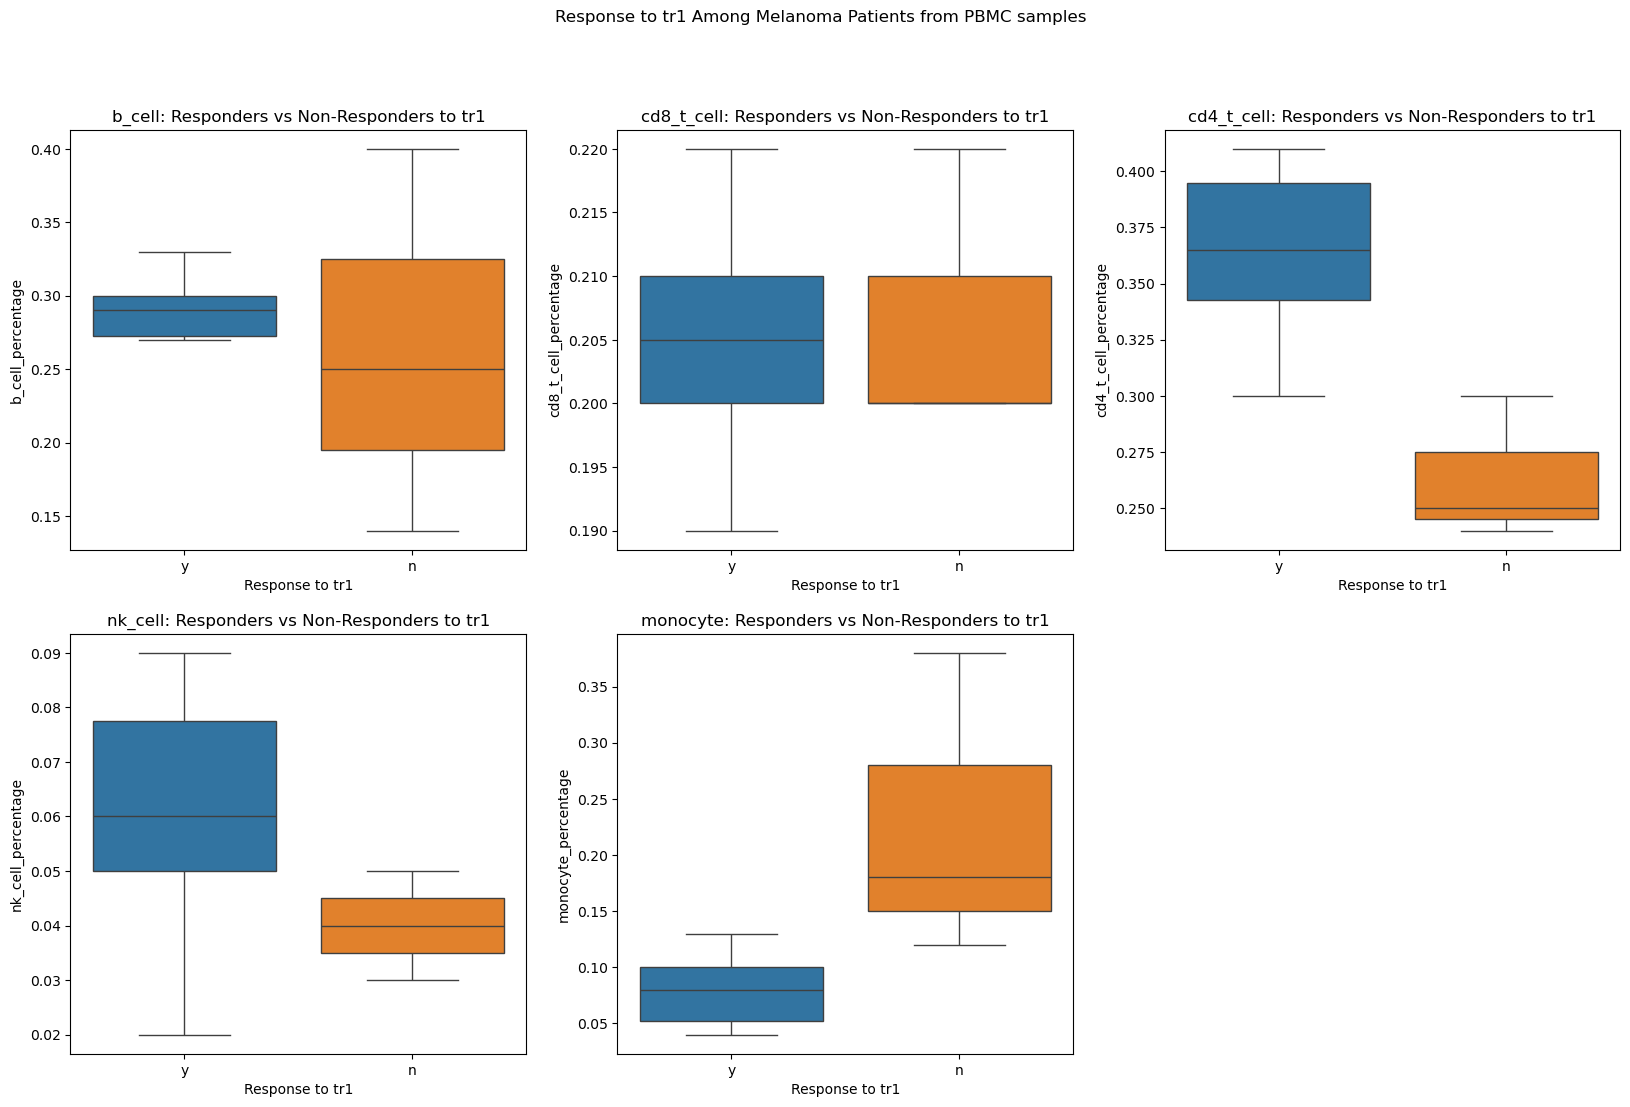

In [96]:
"""
Using subplots to display all plots in grid format:
https://napsterinblue.github.io/notes/python/viz/subplots/
https://seaborn.pydata.org/generated/seaborn.boxplot.html
https://www.geeksforgeeks.org/how-to-create-subplots-in-seaborn/
"""

cell_types = relevant_cols[-5:] # list of cell types' names

fig, ax = plt.subplots(2, 3, figsize=(20, 12)) 
ax = ax.flatten() # to index in the loop

i = 0
for cell_type in cell_types: 
    col_label = cell_type + "_percentage" 
    relevant_data[col_label] = relevant_data[cell_type]/relevant_data["total_counts"]

    sns.boxplot(x=relevant_data["response"], y=relevant_data[col_label], ax=ax[i], hue=relevant_data["response"])
    ax[i].set_xlabel("Response to tr1")
    ax[i].set_title(cell_type + ": Responders vs Non-Responders to tr1")
    i += 1


ax[5].remove() # leftover empty subplot in the 2x3 

fig.suptitle("Response to tr1 Among Melanoma Patients from PBMC samples")

plt.show()



Since these are small samples (n<30), they do not meet the normality conditions for a t-test. 
We can't even approximate many of these as normal distributions since they are skewed. 

An alternative is the Mann Whitney U Test:
https://www.researchgate.net/post/What_test_do_I_use_instead_of_a_t_test_if_the_data_is_not_normal_and_the_sample_sizes_are_unequal

The Scipy library has documentation on this test:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [114]:
for cell_type in cell_types:
    col_label = cell_type + "_percentage" 

    # separating relevant_data into 'y' and 'n' groups before running test
    responders = relevant_data[col_label][relevant_data["response"] == "y"]
    non_responders = relevant_data[col_label][relevant_data["response"] == "n"]
    
    U_stat, p = stats.mannwhitneyu(responders, non_responders)
    
    print("\n" + cell_type + " population:" +" \n")
    print("Mann Whitney U Test Statistic = " + str(U_stat))
    print("p-value = " + str(p))

    # choosing alpha = .05 for significance level
    if p < 0.05:
        print("\nSince the p-value is less than 0.05, this cell population is significantly different in relative frequencies between responders \nand non-responders to tr1.")
    else:
        print("\nSince the p-value is NOT less than 0.05, this cell population is NOT significantly different in relative frequencies between responders \nand non-responders to tr1.")

    print("\n\n")
    


b_cell population: 

Mann Whitney U Test Statistic = 12.0
p-value = 0.5150822787096432

Since the p-value is NOT less than 0.05, this cell population is NOT significantly different in relative frequencies between responders 
and non-responders to tr1.




cd8_t_cell population: 

Mann Whitney U Test Statistic = 8.5
p-value = 1.0

Since the p-value is NOT less than 0.05, this cell population is NOT significantly different in relative frequencies between responders 
and non-responders to tr1.




cd4_t_cell population: 

Mann Whitney U Test Statistic = 17.5
p-value = 0.038055920999867786

Since the p-value is less than 0.05, this cell population is significantly different in relative frequencies between responders 
and non-responders to tr1.




nk_cell population: 

Mann Whitney U Test Statistic = 14.0
p-value = 0.2373017786499998

Since the p-value is NOT less than 0.05, this cell population is NOT significantly different in relative frequencies between responders 
and non-responders 

**Only the cd4_t_cell population has significantly different relative frequencies between responders and non-responders. Based on the boxplots shown earlier, this conclusion makes sense because the cd4_t_cell population seems to have the greatest difference in median and distribution of relative frequencies (between responders and non-responders) out of the five cell populations.**